## AIVLE School [AI 미니프로젝트] '서울시 생활정보 기반 대중교통 수요 분석'<br>

### 미니프로젝트 안내
* 미션: 버스 노선 추가가 필요한 서울시 내 자치구 선정
* 방법: 1부터 4까지의 ipynb 파일 순서대로 진행하며 데이터 불러오기 및 분석(EDA)을 수행하여 서울시 내 자치구별 정보를 도출하고<br> 이를 바탕으로 5. 데이터 분석에서 버스 노선 추가가 필요한 서울시 내 자치구를 선정해봅니다.<br><br>
* 1. 구별 버스정류장 분석.ipynb<br>
-- 1.1 bus_station_boarding.csv 파일을 활용하여 <span style="color:blue">서울시 내 각 구별 정류장, 노선수, 승하차 고객수를 분석</span>합니다.<br>
  그런데 bus_station_boarding.csv 파일에는 서울시와 경기도의 버스정류장이 모두 포함되어 있기 때문에<br>
  1.2 bus_station_seoul.csv의 정보를 추가로 활용하여 서울시 정류장만 골라내어 분석 대상에 포함시킵니다.<br><br>
* 2. 구별 이동인구 분석.ipynb<br>
-- 2. seoul_moving.csv 파일을 활용하여 <span style="color:blue">서울시 내 구별 이동 시간과 이동 인구를 분석</span>합니다.<br><br>
* 3. 구별 등록인구 분석.ipynb<br>
-- 3. seoul_people.csv 파일을 활용하여 <span style="color:blue">서울시 내 구별 등록인구를 분석</span>합니다. <br><br>
* 4. 구별 업종 분석.ipynb<br>
-- 4. business_type.csv 파일을 활용하여 <span style="color:blue">서울시 내 구별 등록업종을 분석</span>합니다.<br><br>
* 5. 데이터 분석.ipynb<br>
-- 위 1~4에서 도출한 데이터 프레임을 합쳐서 <span style="color:blue">서울시 내 어느 구에 버스 노선을 추가해야 할 지</span> 가설 수립 및 검증 과정을 거쳐 분석합니다.<br> (y값은 정류장 수 또는 노선 수)

---

# 1. 버스정류장 분석
### 버스정류장 데이터를 활용하여 서울시 내 각 구별 정류장 수, 노선 수, 승하차 고객수를 분석합니다.
### 이때, 서울시가 아닌 정류장 정보가 포함되어 있다면 이 정류장들을 제거하고 분석해야 합니다.

In [1]:
# 필요 라이브러리를 설치합니다.
%pip install pandas seaborn

Note: you may need to restart the kernel to use updated packages.


## 데이터 안내

[기본 데이터]
* 1.1 bus_station_boarding.csv 
* 서울시 버스노선별 정류장별 승하차 인원 정보
* https://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do


[추가 데이터]
* 1.1 bus_station_seoul.csv
* 서울시 버스정류장 위치정보
* https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do

---

# 1.1. 데이터 불러오기

#### [1.1.1] 데이터 로딩
* Pandas 라이브러리를 활용해서 '1.1 bus_station_boarding.csv'파일을 'bus_station' 변수에 저장하세요.
    * 데이터 파일 로딩시 참고 사항 
        * 구분자(sep)는 ',' 입니다
        * cp949 인코더를 사용해 주세요
    * 데이터를 불러올 때 오류가 발생한다면, 오류에 대해 직접 검색하여 해결해보세요.

In [2]:
import sys
import numpy as np
import pandas as pd

In [3]:
# 아래에 코드를 작성하고 결과를 확인합니다.
path='bus_station_boarding.csv'
bus_station = pd.read_csv(path,sep=",",encoding='cp949')

In [4]:
# 데이터 프레임의 Shape을 확인합니다.
bus_station.shape

(1169878, 8)

---

# 1.2. 기본 정보 확인 및 클렌징

+ 데이터 클렌징 : 결측치, 이상치 등을 제거하여 데이터 분석 결과가 왜곡 되는 문제를 방지하기 위한 정제 과정

#### [1.2.1] 기본 정보 확인하기
* 'bus_station' 데이터의 정보를 확인해보세요.
* 'describe', 'info', 'head', 'tail' 등 전부 활용해 보세요.
* 데이터 중에서 컬럼명으로 봤을 때 int 이어야 할 것 같은데 object인 컬럼들이 있습니다. 왜 그런지 이 컬럼들을 더 분석해보세요.

In [5]:
# 아래에 코드를 작성하고 결과를 확인합니다.
bus_station.describe()

,사용일자,승차총승객수,하차총승객수,등록일자
count,1.169878e+06,1.169878e+06,1.169878e+06,1.169878e+06
mean,2.022042e+07,1.108042e+02,1.082804e+02,2.022043e+07
std,8.661492e+00,1.554787e+02,1.420829e+02,2.667754e+01
min,2.022040e+07,0.000000e+00,0.000000e+00,2.022040e+07
25%,2.022041e+07,1.800000e+01,2.100000e+01,2.022041e+07
50%,2.022042e+07,6.300000e+01,6.800000e+01,2.022042e+07
75%,2.022042e+07,1.460000e+02,1.450000e+02,2.022043e+07
max,2.022043e+07,3.990000e+03,3.615000e+03,2.022050e+07


In [6]:
# 아래에 코드를 작성하고 결과를 확인합니다.
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169878 entries, 0 to 1169877
Data columns (total 8 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1169878 non-null  int64 
 1   노선번호        1169878 non-null  object
 2   노선명         1169878 non-null  object
 3   버스정류장ARS번호  1169878 non-null  object
 4   역명          1169878 non-null  object
 5   승차총승객수      1169878 non-null  int64 
 6   하차총승객수      1169878 non-null  int64 
 7   등록일자        1169878 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 71.4+ MB


In [7]:
# 아래에 코드를 작성하고 결과를 확인합니다.
bus_station.head(5)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404


In [8]:
# 아래에 코드를 작성하고 결과를 확인합니다.
bus_station.tail(5)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자
1169873,20220430,7738,7738번(은평공영차고지~홍제역),12004,수색교,2,32,20220503
1169874,20220430,201,201번(구리~서울역),06278,세종대왕기념관,153,43,20220503
1169875,20220430,강서01,강서01(약수터~등촌역),16555,화곡본동시장,133,6,20220503
1169876,20220430,3321,3321번(강동차고지~강동구청),25236,굽은다리사거리,36,41,20220503
1169877,20220430,201,201번(구리~서울역),06280,영휘원사거리.(구)홍릉사거리,122,49,20220503


#### [1.2.2] 버스정류장 위치를 구 별로 구분 하기

* tip! 버스정류장ARS번호의 앞 두자리가 구를 의미합니다.

* '자치구' column을 추가하여 정류장이 위치한 구 이름을 등록해주세요.


In [9]:
# 먼저, bus_station에서 버스정류장ARS번호의 정보를 확인해보세요.
bus_station['버스정류장ARS번호']

0          06243
1          06242
2          06238
3          06309
4          11428
           ...  
1169873    12004
1169874    06278
1169875    16555
1169876    25236
1169877    06280
Name: 버스정류장ARS번호, Length: 1169878, dtype: object

In [10]:
# 버스정류장 ARS 번호의 앞자리 2개를 잘라내어 새로 '자치구' 컬럼을 생성합니다
ars = bus_station['버스정류장ARS번호']
bus_station['자치구'] = ars.str[0:2]
bus_station.head()


,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,06
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,06
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,06
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,06
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,11


In [11]:
# 자치구의 값들이 어떻게 구성되어 있는 지 확인해봅니다. (ex: unique 활용)
bus_station['자치구'].unique()

array(['06', '11', '09', '01', '14', '13', '04', '22', '38', '20', '21',
       '19', '18', '03', '02', '08', '17', '05', '10', '35', '12', '07',
       '68', '16', '~', '42', '49', '39', '15', '23', '44', '25', '24',
       '48', '36', '40', '57', '56', '28', '61', '63', '46', '45', '31',
       '30', '37', '60', '27', '47', '59'], dtype=object)

#### [1.2.3] 서울시 자치구에 해당하는 버스정류장만 추출하기

* 위에서 살펴본 자치구의 값은 숫자 2자리로 구성되어 있습니다. 
* 그런데 서울시 구별 코드정보는 01부터 25까지라고 합니다(도메인지식)
* 그렇다면 01부터 25의 범위를 넘어서는 데이터는 서울시 구별 정보가 아닐 것입니다. 이번 미니프로젝트에서는 서울시에 관한 정보만 분석하고자 하므로 이 데이터를 어떻게 처리하면 좋을지 생각하여 적용해보세요.
* 분석 시의 편의를 위해 숫자 2자리 구별 코드는 구 이름으로 변환해주세요.
* 서울시 구별 코드정보<br>
    '01': '종로구',
    '02': '중구',
    '03': '용산구',
    '04': '성동구',
    '05': '광진구',
    '06': '동대문구',
    '07': '중랑구',
    '08': '성북구',
    '09': '강북구',
    '10': '도봉구',
    '11': '노원구',
    '12': '은평구',
    '13': '서대문구',
    '14': '마포구',
    '15': '양천구',
    '16': '강서구',
    '17': '구로구',
    '18': '금천구',
    '19': '영등포구',
    '20': '동작구',
    '21': '관악구',
    '22': '서초구',
    '23': '강남구',
    '24': '송파구',
    '25': '강동구'

In [12]:
# 숫자 2자리 구 코드를 구 이름으로 변환합니다
bus_station['자치구']=bus_station['자치구'].map({'01': '종로구', '02': '중구', '03': '용산구', '04': '성동구', '05': '광진구', '06': '동대문구', '07': '중랑구', '08': '성북구', '09': '강북구', '10': '도봉구', '11': '노원구', '12': '은평구', '13': '서대문구', '14': '마포구', '15': '양천구', '16': '강서구', '17': '구로구', '18': '금천구', '19': '영등포구', '20': '동작구', '21': '관악구', '22': '서초구', '23': '강남구', '24': '송파구', '25': '강동구'})


In [13]:
# 숫자 2자리 구 코드를 구 이름으로 변환한 결과를 확인해봅니다.
bus_station['자치구'].unique()

array(['동대문구', '노원구', '강북구', '종로구', '마포구', '서대문구', '성동구', '서초구', nan,
       '동작구', '관악구', '영등포구', '금천구', '용산구', '중구', '성북구', '구로구', '광진구',
       '도봉구', '은평구', '중랑구', '강서구', '양천구', '강남구', '강동구', '송파구'],
      dtype=object)

In [14]:
# 자치구 컬럼의 값들을 확인해봅니다.
bus_station.head(20)

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구
0,20220401,2112,2112번(면목동~성북동),06243,장안동삼성쉐르빌아파트,31,156,20220404,동대문구
1,20220401,2112,2112번(면목동~성북동),06242,새서울병원,46,153,20220404,동대문구
2,20220401,2112,2112번(면목동~성북동),06238,장안동근린공원,11,80,20220404,동대문구
3,20220401,2112,2112번(면목동~성북동),06309,휘경공고휘경주공아파트,56,65,20220404,동대문구
4,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구
5,20220401,101,101번(화계사~동대문),09005,수유시장.성신여대미아캠퍼스앞,264,201,20220404,강북구
6,20220401,101,101번(화계사~동대문),09007,미아역.신일중고,197,120,20220404,강북구
7,20220401,105,105번(상계동~서울역),06426,청량리수산시장,157,114,20220404,동대문구
8,20220401,105,105번(상계동~서울역),06018,청량리역환승센터,226,181,20220404,동대문구
9,20220401,142,142번(도봉동~고속터미널),01231,종로구민회관.창신동두산아파트,180,323,20220404,종로구


#### [1.2.4] 결측치 처리

In [15]:
# NaN 값을 제거 합니다.
# 또는 위에서 처리한 방식에 따라 NaN 값이 없는 경우는 자치구 명으로 변환되지 않은 행(서울시 자치구에 해당하지 않는 정보)을 제거합니다
temp = bus_station.loc[bus_station['자치구'].notnull()]

In [16]:
# NaN 값을 제거한 결과를 확인해봅니다. 결측치가 제가된 만큼 컬럼 갯수가 줄어들었는 지 확인해봅니다.
bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1169878 entries, 0 to 1169877
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   사용일자        1169878 non-null  int64 
 1   노선번호        1169878 non-null  object
 2   노선명         1169878 non-null  object
 3   버스정류장ARS번호  1169878 non-null  object
 4   역명          1169878 non-null  object
 5   승차총승객수      1169878 non-null  int64 
 6   하차총승객수      1169878 non-null  int64 
 7   등록일자        1169878 non-null  int64 
 8   자치구         1064594 non-null  object
dtypes: int64(4), object(5)
memory usage: 80.3+ MB


#### [1.2.5] 데이터 추가 분석 (버스정류장의 위치가 서울시인지 재확인)

* 위에서 버스정류장ARS번호의 앞 2자리로 서울시 자치구에 속한 버스정류장만 추출했습니다. 
* 그런데 이렇게 추출한 버스정류장도 서울시에 속하지 않는 경우가 있어, 추가 데이터를 활용하여 한번 더 서울시 정류장만 추출하려고 합니다.

In [17]:
# 자치구 별로 정류장의 개수를 확인해봅니다. (nunique로 고유값의 갯수만 확인)
bus_station.groupby('자치구',as_index=False)['버스정류장ARS번호'].nunique()

,자치구,버스정류장ARS번호
0,강남구,506
1,강동구,373
2,강북구,413
3,강서구,566
4,관악구,468
5,광진구,272
6,구로구,486
7,금천구,345
8,노원구,515
9,도봉구,361


In [18]:
# 강남구와 서초구에 500개가 넘는 버스정류장이 있습니다. 
# 이 중에 랜덤으로 몇 개를 골라 해당 자치구의 정류장이 맞는 지 확인해 보고자 합니다.
# 강남구의 버스정류장ARS번호 전체값을 출력해, 강남구의 버스정류장ARS번호 하나를 조사(네이버 지도에서 버스정류장 검색)해봅니다.
bus_station.loc[bus_station['자치구']=='강남구',['자치구','버스정류장ARS번호']]


,자치구,버스정류장ARS번호
897,강남구,23783
904,강남구,23081
905,강남구,23074
923,강남구,23062
1020,강남구,23045
...,...,...
1169835,강남구,23223
1169842,강남구,23216
1169850,강남구,23189
1169861,강남구,23290


#### 여기서 잠깐!

* 예를 들어 강남구 정류장 중 하나인 23081 정류장을 네이버지도에서 버스정류장 검색을 해보면 강남구가 아니라 남양주에 위치해 있습니다. 
* 이것은 2015년경 버스 노선을 정리 하면서 서울에서 경기도까지 이어지는 노선들의 버스정류장 ARS번호에 서울시 코드를 부여하여 생긴 현상입니다.(도메인지식) 
* 하지만 우리는 서울시 내의 데이터가 필요하므로 적절한 조치가 필요합니다.

bus_station_seoul.csv#### [1.2.6] 추가 csv 파일로 서울시 버스정류장만 추출하기
* 위에서 작업한 bus_station 데이터와 서울의 버스 정류장 데이터를 merge하는 방법을 활용해 봅니다.
* 서울의 버스 정류장만 포함하고 있는 csv 파일은 아래와 같이 제공됩니다.
* 파일명: 1.2 bus_station_seoul.csv
* 출처: https://data.seoul.go.kr/dataList/OA-15067/S/1/datasetView.do (서울 열린데이터 광장)

In [19]:
# 데이터 로딩 (1.2 bus_station_seoul.csv 의 데이터를 불러와서 only_seoul 변수에 저장합니다)
# 데이터 로딩 시 오류가 발생하는 경우 검색 등을 통해 encoding 값을 적용해보세요.
path2='bus_station_seoul.csv'
only_seoul = pd.read_csv(path2,sep=",",encoding='utf-8')

In [20]:
# 서울의 버스정류장 데이터의 정보 확인
only_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10935 entries, 0 to 10934
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ARS-ID  10935 non-null  int64 
 1   정류소명    10935 non-null  object
dtypes: int64(1), object(1)
memory usage: 171.0+ KB


In [21]:
# 데이터 살펴보기
only_seoul.head()

,ARS-ID,정류소명
0,1001,종로2가사거리
1,1002,창경궁.서울대학교병원
2,1003,명륜3가.성대입구
3,1004,종로2가.삼일교
4,1005,혜화동로터리.여운형활동터


In [22]:
# 위에서 네이버 지도로 확인했던 강남구 정류장ARS번호 23081이 이 데이터프레임에 있는지 찾아봅니다.
only_seoul.loc[only_seoul['ARS-ID']=='23081',['정류소명']]


,정류소명


In [23]:
# bus_station과 only_seoul 데이터를 합치기 전에 버스정류장ARS번호의 type을 변경합니다. 
# # 어떤 type으로 변경해야 할 지 생각해보세요.
# bus_station = bus_station.astype({'버스정류장ARS번호':'int64'})
# bus_station['버스정류장ARS번호']=pd.to_numeric(bus_station['버스정류장ARS번호'])
# bus_station.select_dtypes(include=['object']).head()
# bus_station.dtypes
only_seoul['ARS-ID'] = only_seoul['ARS-ID'].apply(str)
only_seoul.dtypes

ARS-ID    object
정류소명      object
dtype: object

In [24]:
# 두 데이터를 합치기 전에 데이터의 컬럼명을 변경합니다. (버스정류장ARS번호로 맞춥니다.)
only_seoul.rename(columns={'ARS-ID':'버스정류장ARS번호'},inplace=True)

In [25]:
# bus_station과 only_seoul 데이터를 merge 해봅니다.
bus_station = pd.merge(bus_station, only_seoul, how = 'inner')

In [26]:
# bus_station과 only_seoul 데이터를 merge한 결과를 확인해봅니다.
bus_station

,사용일자,노선번호,노선명,버스정류장ARS번호,역명,승차총승객수,하차총승객수,등록일자,자치구,정류소명
0,20220401,100,100번(하계동~용산구청),11428,한성여객종점,9,5,20220404,노원구,한성여객종점
1,20220401,1120,1120번(하계동~삼양동입구),11428,한성여객종점,69,0,20220404,노원구,한성여객종점
2,20220401,1144,1144번(하계동~우이동),11428,한성여객종점,9,0,20220404,노원구,한성여객종점
3,20220401,1154,1154번(하계동~장암동),11428,한성여객종점,58,1,20220404,노원구,한성여객종점
4,20220401,1227,1227번(하계동~제기동),11428,한성여객종점,69,1,20220404,노원구,한성여객종점
...,...,...,...,...,...,...,...,...,...,...
735450,20220429,7019,7019번(은평공영차고지~시청(서소문)),12242,응암2동주민센터,3,161,20220502,은평구,응암2동주민센터
735451,20220429,7734,7734번(진관공영차고지~홍대입구역),12242,응암2동주민센터,29,139,20220502,은평구,응암2동주민센터
735452,20220430,7734,7734번(진관공영차고지~홍대입구역),12242,응암2동주민센터,15,82,20220503,은평구,응암2동주민센터
735453,20220430,7019,7019번(은평공영차고지~시청(서소문)),12242,응암2동주민센터,2,99,20220503,은평구,응암2동주민센터


In [27]:
# 버스정류장ARS번호 갯수를 확인해봅니다.
# bus_station.groupby('자치구',as_index=False)['버스정류장ARS번호'].nunique()
bus_station.info() #1064594 -> 735455

<class 'pandas.core.frame.DataFrame'>
Int64Index: 735455 entries, 0 to 735454
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   사용일자        735455 non-null  int64 
 1   노선번호        735455 non-null  object
 2   노선명         735455 non-null  object
 3   버스정류장ARS번호  735455 non-null  object
 4   역명          735455 non-null  object
 5   승차총승객수      735455 non-null  int64 
 6   하차총승객수      735455 non-null  int64 
 7   등록일자        735455 non-null  int64 
 8   자치구         735455 non-null  object
 9   정류소명        735455 non-null  object
dtypes: int64(4), object(6)
memory usage: 61.7+ MB


버스정류장ARS번호#### [1.2.7] 구 별로 버스 정류장의 개수 확인

In [28]:
# 구 별로 버스 정류장의 개수를 확인해 봅니다.
# 구 별 버스정류장 개수로 구성된 데이터프레임을 seoul_bus_station_ARS에 저장합니다.(groupby 함수에서 as_index 옵션을 사용해보세요)
# seoul_bus_station_ARS=bus_station.groupby('자치구',as_index=False)['버스정류장ARS번호'].nunique()
seoul_bus_station_ARS=bus_station.groupby('자치구',as_index=False)['버스정류장ARS번호'].nunique()

#### [1.2.8] 구 별로 버스 노선이 몇 개 지나가는 지 확인
* 구 별로 버스 노선의 개수 확인

In [29]:
# 구 별로 버스 노선 개수를 확인해 봅니다.
# 구 별 버스 노선 개수로 구성된 데이터프레임을 seoul_bus_station_line에 저장합니다.
seoul_bus_station_line=bus_station.groupby('자치구',as_index=False)['노선명'].nunique()



#### [1.2.9] 구 별로 승차 총 승객수, 하차 총 승객수 확인

In [30]:
# 구 별 승차총승객수, 하차총승객수를 확인해봅니다.
# 구 별 승차총승객수, 하차총승객수로 구성된 데이터프레임을 seoul_bus_station_sum에 저장합니다.
seoul_bus_station_sum=bus_station.groupby('자치구',as_index=False)[['승차총승객수','하차총승객수']].sum()
seoul_bus_station_sum

,승차총승객수,하차총승객수
자치구,,
강남구,8030483,7569213
강동구,2890053,2830506
강서구,4681083,4652828
관악구,7655819,7792476
구로구,4942197,4730992
금천구,3776658,3581930
노원구,4353295,4292724
도봉구,3304305,3211421
동작구,5314274,5112276


#### [1.2.10] 구 별로 승차 평균 승객수, 하차 평균 승객수 확인

In [31]:
# 구 별 승차 승객수, 하차 승객수의 평균을 확인해봅니다.
# 구 별 승차 승객수, 하차 승객수의 평균으로 구성된 데이터프레임을 seoul_bus_station_mean에 저장합니다.
# 컬럼명은 승차평균승객수, 하차평균승객수로 바꾸세요.
seoul_bus_station_mean=bus_station.groupby('자치구',as_index=False)[['승차총승객수','하차총승객수']].mean()
seoul_bus_station_mean.rename(columns={'승차총승객수':'승차평균승객수','하차총승객수':'하차평균승객수'},inplace=True)

#### [1.2.11] 데이터 프레임 합치기

In [41]:
# 4개의 데이터 프레임을 합쳐서 seoul_bus_station에 저장해보세요.

# seoul_bus_station_ARS
# seoul_bus_station_line
# seoul_bus_station_sum
# seoul_bus_station_mean
# seoul_bus_station = pd.concat([seoul_bus_station_ARS, seoul_bus_station_line,seoul_bus_station_mean,seoul_bus_station_sum], ignore_index=True)
# seoul_bus_station2=pd.merge(seoul_bus_station_ARS,seoul_bus_station_line,how='inner')
# seoul_bus_station3=pd.merge(seoul_bus_station2,seoul_bus_station_mean,how='inner')
# seoul_bus_station=pd.merge(seoul_bus_station3,seoul_bus_station_sum,how='inner')
# seoul_bus_station
seoul_bus_station = pd.concat([seoul_bus_station_ARS,seoul_bus_station_line,seoul_bus_station_sum,seoul_bus_station_mean],axis=1,join='inner')
seoul_bus_station

,버스정류장ARS번호,노선명,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
자치구,,,,,,
강남구,499,96,8030483,7569213,128.767927,121.371512
강동구,369,23,2890053,2830506,99.161194,97.118065
강서구,566,53,4681083,4652828,88.119480,87.587591
관악구,466,92,7655819,7792476,154.753674,157.516040
구로구,486,83,4942197,4730992,119.235615,114.140076
금천구,345,61,3776658,3581930,123.098370,116.751304
노원구,514,60,4353295,4292724,88.476211,87.245168
도봉구,359,48,3304305,3211421,106.859356,103.855540
동작구,438,101,5314274,5112276,124.295965,119.571419


In [42]:
# 필요에 따라 column명을 데이터 의미에 맞게 적절히 변경하세요.
seoul_bus_station.rename(columns={'버스정류장ARS번호':'정류장수','노선명':'노선수'},inplace=True)

In [43]:
seoul_bus_station

,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수
자치구,,,,,,
강남구,499,96,8030483,7569213,128.767927,121.371512
강동구,369,23,2890053,2830506,99.161194,97.118065
강서구,566,53,4681083,4652828,88.119480,87.587591
관악구,466,92,7655819,7792476,154.753674,157.516040
구로구,486,83,4942197,4730992,119.235615,114.140076
금천구,345,61,3776658,3581930,123.098370,116.751304
노원구,514,60,4353295,4292724,88.476211,87.245168
도봉구,359,48,3304305,3211421,106.859356,103.855540
동작구,438,101,5314274,5112276,124.295965,119.571419


In [44]:
# 해당 데이터프레임을 'df_seoul_bus_station.csv' 파일로 저장하세요.
seoul_bus_station.to_csv("df_seoul_bus_station.csv")

---

# 1.3.데이터 분석하기
+ 데이터의 형태를 살펴보고 다양한 분석기법을 통해 모델링에 적합하도록 정제요소를 선별하세요.
  * 데이터들의 패턴 탐색
  * 변수들간의 관계 파악

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화 한글폰트 설정
# 맑은 고딕

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

# scipy
import scipy.stats as spst  

#### [1.3.1] 데이터 분포 알아보기
* 다양한 변수를 기준으로 그래프를 그려보고 인사이트를 도출해보세요.

In [46]:
seoul_bus_station.dtypes

정류장수         int64
노선수          int64
승차총승객수       int64
하차총승객수       int64
승차평균승객수    float64
하차평균승객수    float64
dtype: object

ValueError: Could not interpret input '자치구'

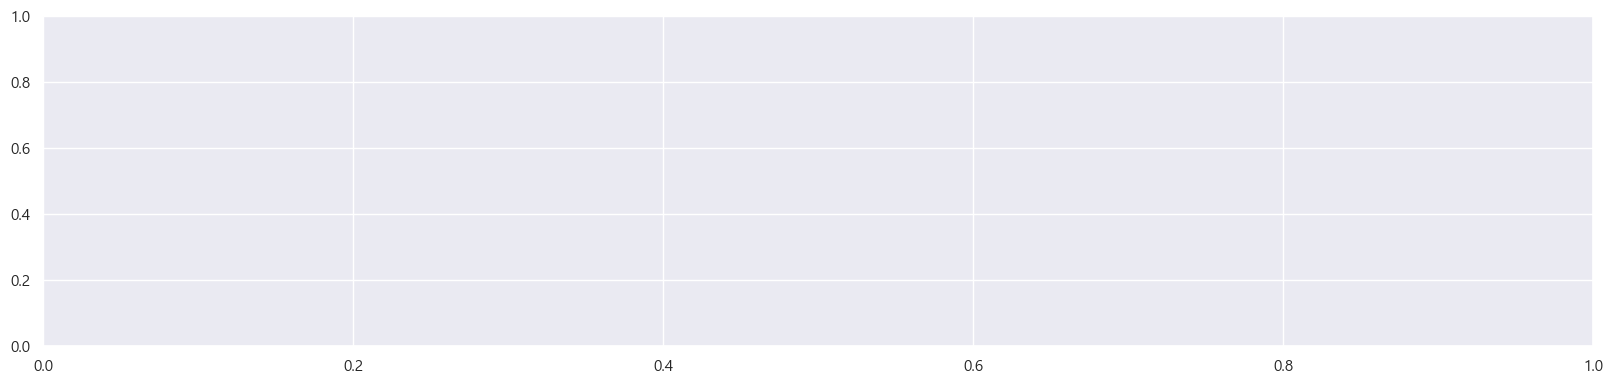

In [47]:
plt.figure(figsize=(20,30))
plt.subplot(6,1,1)
sns.barplot(x='자치구',y='정류장수',data=seoul_bus_station)
plt.subplot(6,1,2)
sns.barplot(x='자치구',y='노선수',data=seoul_bus_station)
plt.subplot(6,1,3)
sns.barplot(x='자치구',y='승차평균승객수',data=seoul_bus_station)
plt.subplot(6,1,4)
sns.barplot(x='자치구',y='하차평균승객수',data=seoul_bus_station)
plt.subplot(6,1,5)
sns.barplot(x='자치구',y='승차총승객수',data=seoul_bus_station)
plt.subplot(6,1,6)
sns.barplot(x='자치구',y='하차총승객수',data=seoul_bus_station)
plt.show()


In [ ]:
plt.figure(figsize = (20,12))
seoul_bus_station.plot(x='자치구',y='정류장수')

In [ ]:
seoul_bus_station.plot(x='자치구',y='노선수')

In [268]:
cor_mtx = test.corr() #전부 총합한 데이터프레임

cor_group = {
    '강한 상관관계': [],
    '중간 상관관계': [],
    '약한 상관관계': [],
    '상관관계 없음': []
}

for i in range(len(cor_mtx.columns)):
    for j in range(i):
        if i != j:
            value = cor_mtx.iloc[i, j]
            if abs(value) > 0.5:
                cor_group['강한 상관관계'].append((cor_mtx.columns[i], cor_mtx.columns[j]))
            elif abs(value) > 0.2:
                cor_group['중간 상관관계'].append((cor_mtx.columns[i], cor_mtx.columns[j]))
            elif abs(value) > 0.1:
                cor_group['약한 상관관계'].append((cor_mtx.columns[i], cor_mtx.columns[j]))
            else:
                cor_group['상관관계 없음'].append((cor_mtx.columns[i], cor_mtx.columns[j]))
df = {}
for name, data in cor_group.items():
    df[name] = pd.DataFrame(data, columns=['기준점', '상관관계'])
    
df_H = pd.DataFrame.from_dict(df['강한 상관관계'])
df_M = pd.DataFrame.from_dict(df['중간 상관관계'])
df_L = pd.DataFrame.from_dict(df['약한 상관관계'])
df_N = pd.DataFrame.from_dict(df['상관관계 없음'])

NameError: name 'test' is not defined

In [141]:
# 아래에 코드를 작성하고 결과를 확인합니다.


In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1.  
승ㅊ 86,91,93 / 21,46 관악구, 강남구, 서초구 / 강동구, 도봉구
# 2. 도로 면적 합이 제일 큰 구는? 강남구 면적이 가장 큰 구 : 서초구
# 3.

---